# <font color='darkorange'>**Star Formation History (SFH) tutorial**</font> 

In [1]:
import numpy as np
from galapy.analysis.plot import plt, format_axes_ticks

In [2]:
import galapy.StarFormationHistory as gpsfh

In [3]:
tau_quench = 8.e+8

In [4]:
sfh_insitu = gpsfh.SFH( tau_quench, model = 'insitu', psi_max = 100, tau_star = 3.e+8 )

In [5]:
sfh_const = gpsfh.SFH( tau_quench, model = 'constant', psi = 1. )

In [6]:
sfh_dexp = gpsfh.SFH( tau_quench, model = 'delayedexp', psi_norm = 1, k_shape = 0.2, tau_star = 1.e+8 )

In [7]:
sfh_lnorm = gpsfh.SFH( tau_quench, model = 'lognormal', psi_norm = 100, sigma_star = 2., tau_star = 3.e+8 )

In [8]:
tau = np.logspace( 6, 10, 200 )
psi_insitu = sfh_insitu( tau )
psi_const  = sfh_const( tau )
psi_dexp   = sfh_dexp( tau )
psi_lnorm  = sfh_lnorm( tau )

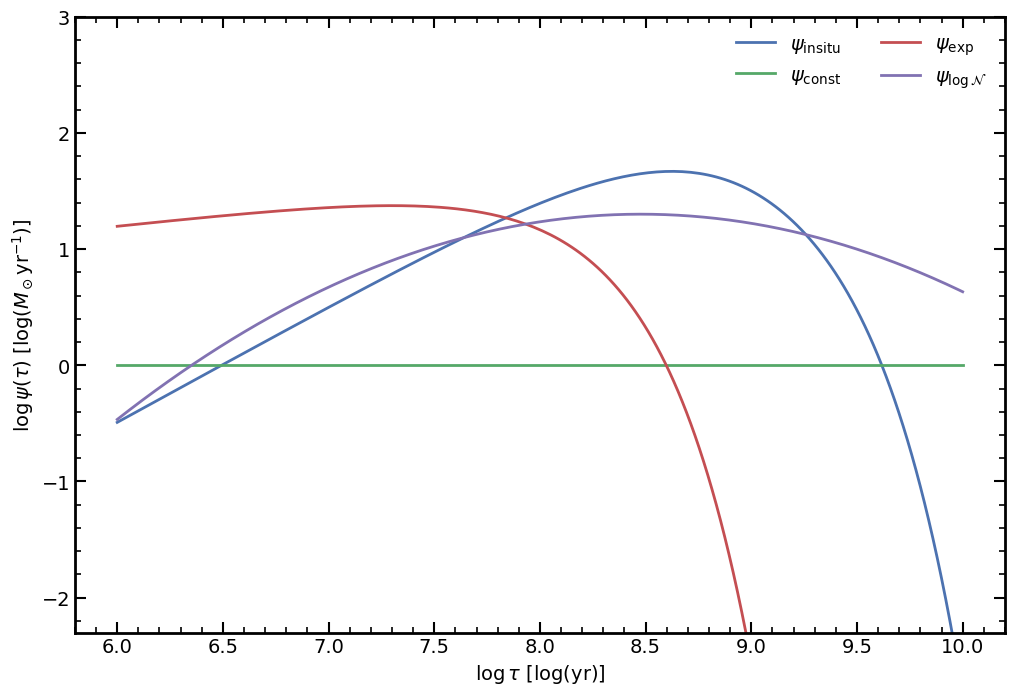

In [9]:
fig = plt.figure( figsize = ( 12,8 ) )
plt.ylim( [ -2.3, 3. ] )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log\\psi(\\tau)$ $[\\log (M_\\odot \\mathrm{yr}^{-1})]$', fontsize = 14 )
# summing an arbitrary small number (1.e-7) to avoid log10(0.) values:
plt.plot( np.log10( tau ), np.log10( psi_insitu + 1.e-7 ), label = '$\\psi_\\mathrm{in situ}$' )
plt.plot( np.log10( tau ), np.log10( psi_const + 1.e-7 ),  label = '$\\psi_\\mathrm{const}$' )
plt.plot( np.log10( tau ), np.log10( psi_dexp + 1.e-7 ),   label = '$\\psi_\\mathrm{exp}$' )
plt.plot( np.log10( tau ), np.log10( psi_lnorm + 1.e-7 ),  label = '$\\psi_{\\log\\mathcal{N}}$' )
plt.legend( fontsize = 14, ncol = 2 )
format_axes_ticks(fig)

In [10]:
Mstar_insitu = sfh_insitu.Mstar( tau )
Mstar_const  = sfh_const.Mstar( tau )
Mstar_dexp   = sfh_dexp.Mstar( tau )
Mstar_lnorm  = sfh_lnorm.Mstar( tau )

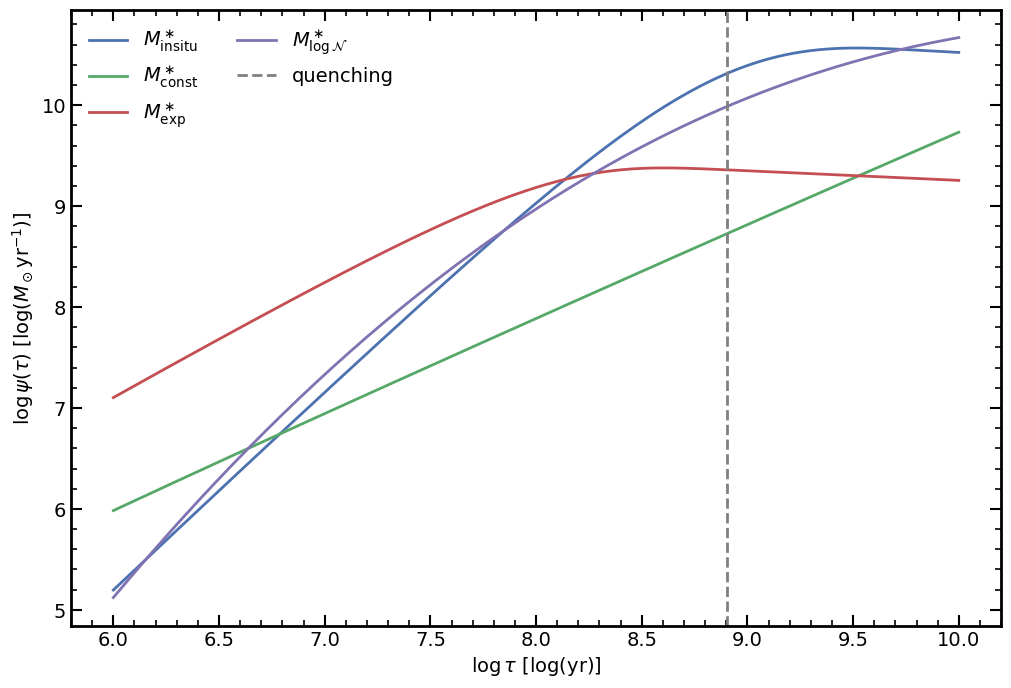

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize = ( 12,8 ) )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log\\psi(\\tau)$ $[\\log (M_\\odot \\mathrm{yr}^{-1})]$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( Mstar_insitu + 1.e-7 ), label = '$M_\\mathrm{in situ}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_const + 1.e-7 ),  label = '$M_\\mathrm{const}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_dexp + 1.e-7 ),   label = '$M_\\mathrm{exp}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_lnorm + 1.e-7 ),  label = '$M_{\\log\\mathcal{N}}^\\ast$' )
plt.axvline( np.log10( tau_quench ), color = 'gray', ls = '--', label = 'quenching')
plt.legend( fontsize = 14, ncol = 2 )
format_axes_ticks(fig)

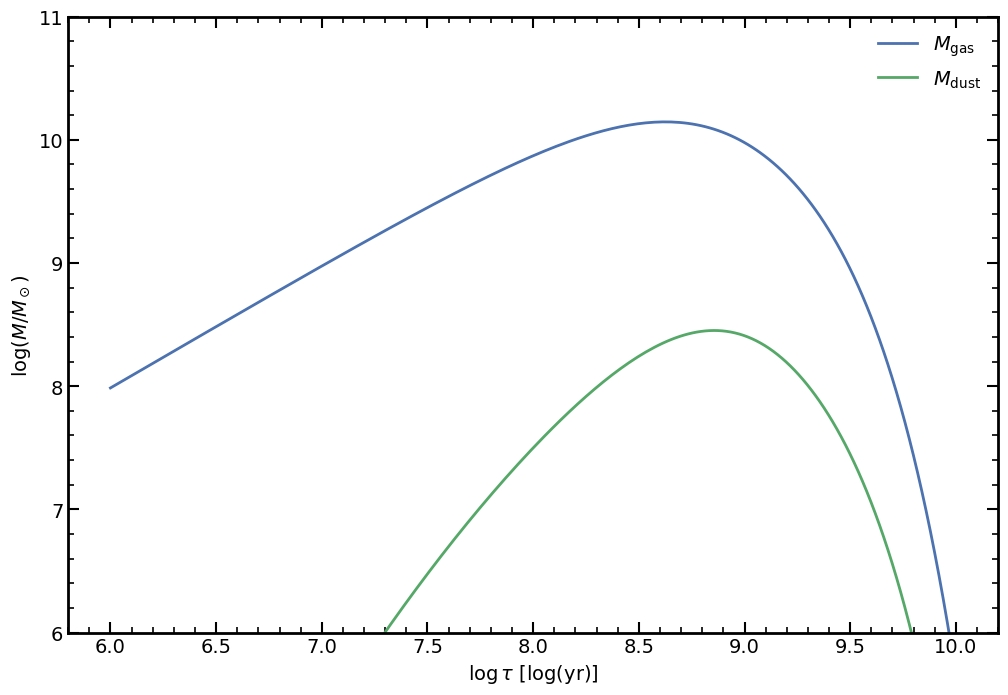

In [12]:
fig = plt.figure( figsize = ( 12,8 ) )
plt.ylim( [ 6., 11. ] )

plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log ( M / M_\\odot)$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Mgas( tau ) + 1.e-7 ), label = '$M_\\mathrm{gas}$' )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Mdust( tau ) + 1.e-7 ), label = '$M_\\mathrm{dust}$' )
plt.legend( fontsize = 14 )
format_axes_ticks(fig)

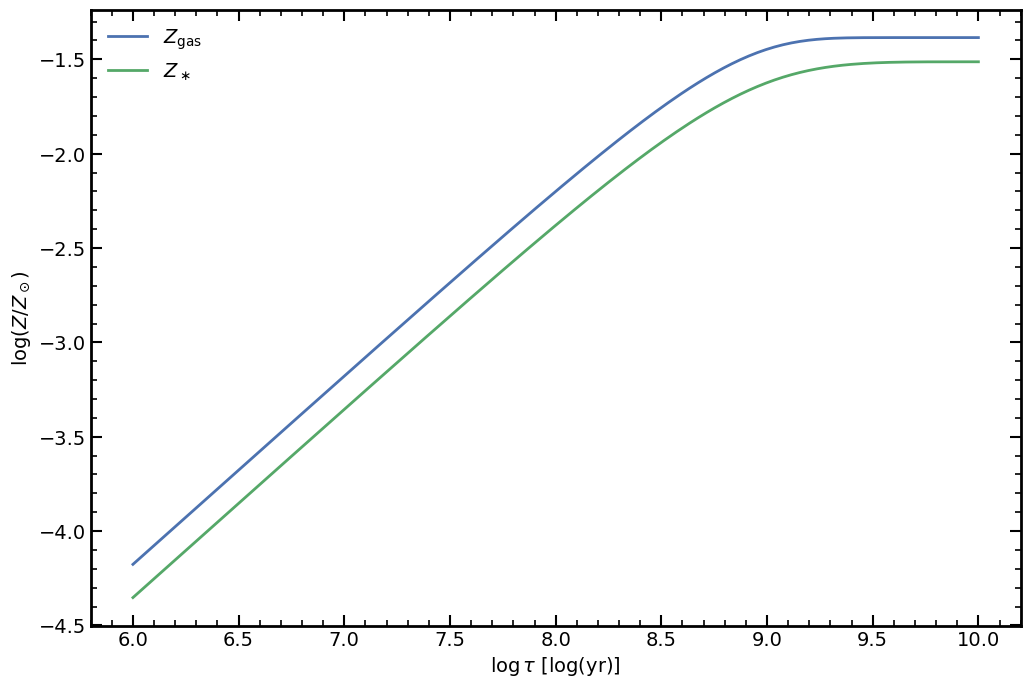

In [13]:
fig = plt.figure( figsize = ( 12,8 ) )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log ( Z / Z_\\odot)$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Zgas( tau ) ), label = '$Z_\\mathrm{gas}$' )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Zstar( tau ) ), label = '$Z_\\ast$' )
plt.legend( fontsize = 14 )
format_axes_ticks(fig)

# <font color='darkorange'>**Composite Stellar Population (CSP) tutorial**</font> 

In [14]:
import numpy as np
from galapy.analysis.plot import plt, format_axes_ticks

In [15]:
import galapy.CompositeStellarPopulation as gpcsp

In [16]:
gpcsp.print_ssp_libs()

Available SSP formats
---------------------
* bc03.stelib.chab;
* bc03.basel.chab;
* bc03.basel.chab.refined;
* bc03.stelib.chab.extrap;
* parsec22.NTL.refined;
* parsec22.NT.refined;
* parsec22.NT;
* parsec22.NTL;



In [18]:
csp = gpcsp.CSP( ssp_lib = 'bc03.basel.chab' )

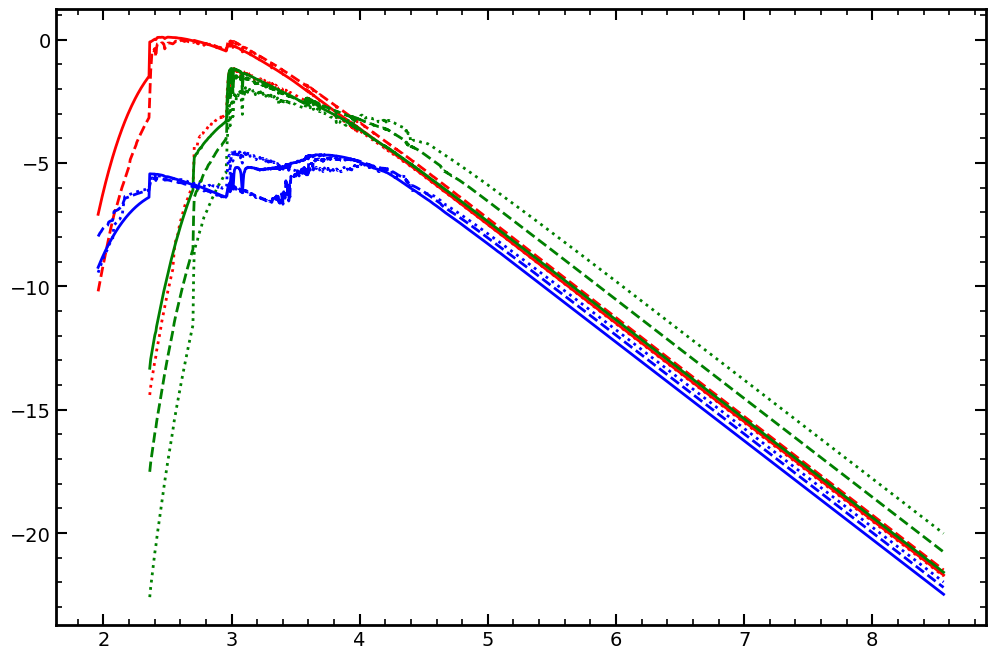

In [20]:
itv, stv = [ 10, 100, 220 ], [ 'r', 'g', 'b' ]
izv, szv = [ 0, 3, 6 ], [ '-', '--', ':' ]
fig = plt.figure(figsize=(12,8))
for it, st in zip( itv, stv ) :
    for iz, sz in zip( izv, szv ) :
        plt.plot( np.ma.log10( csp.l ), np.ma.log10( [ csp.SSP( il, it, iz ) for il in range( csp.l.shape[0] ) ] ),
                  color=st, linestyle=sz )
format_axes_ticks(fig)

In [21]:
from galapy.StarFormationHistory import SFH
sfh = SFH()

In [22]:
ages = [ 1.e+7, 1.e+8, 1.e+9 ]
Lcsp = [ csp.emission( age, sfh ) for age in ages ]

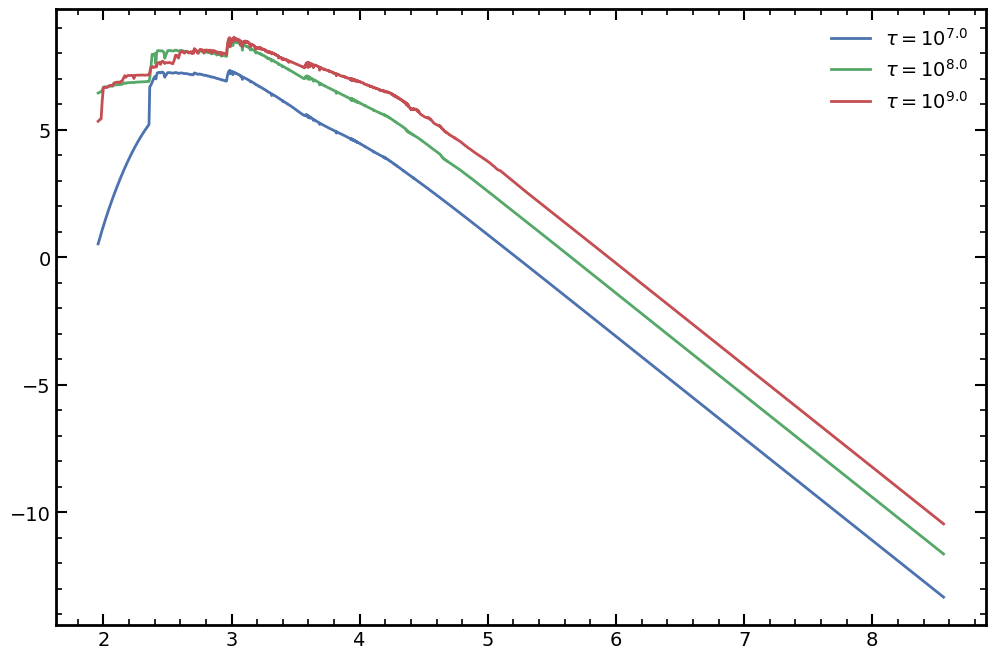

In [24]:
fig = plt.figure(figsize=(12,8))
for LL, age in zip( Lcsp, ages ) :
    plt.plot( np.ma.log10( csp.l ), np.ma.log10( LL ), label = f'$\\tau = 10^{{{np.log10(age):.1f}}} $' )
plt.legend(fontsize=14)
format_axes_ticks(fig)

# <font color='darkorange'>**Inter-Stellar Medium (ISM) tutorial**</font> 

In [25]:
import numpy as np
from galapy.analysis.plot import plt, format_axes_ticks

In [26]:
import galapy.InterStellarMedium as gpism

In [27]:
ism = gpism.ISM()

In [28]:
ll = np.logspace( 0, 10, 300 )

In [29]:
Lsun = 3.828e+33

#### - Molecular-Clouds

In [30]:
gpism.ism_build_params(phase='mc')

{'f_MC': 0.5,
 'norm_MC': 100.0,
 'N_MC': 1000.0,
 'R_MC': 10.0,
 'Zgas': 0.01,
 'tau_esc': 10000000.0,
 'Mgas': 1000000000.0,
 'dMClow': 1.3,
 'dMCupp': 1.6}

#### - Diffuse-Dust

In [31]:
gpism.ism_build_params(phase='dd')

{'f_MC': 0.5,
 'norm_DD': 1.0,
 'Mdust': 10000000.0,
 'Rdust': 1000.0,
 'f_PAH': 0.2,
 'dDDlow': 0.7,
 'dDDupp': 2.0}

## **ISM Emission**

In [32]:
ism.mc.set_temperature( 30 )
ism.dd.set_temperature( 38 )

In [33]:
Lmc = ism.mc.emission(ll)
Ldd = ism.dd.emission(ll)

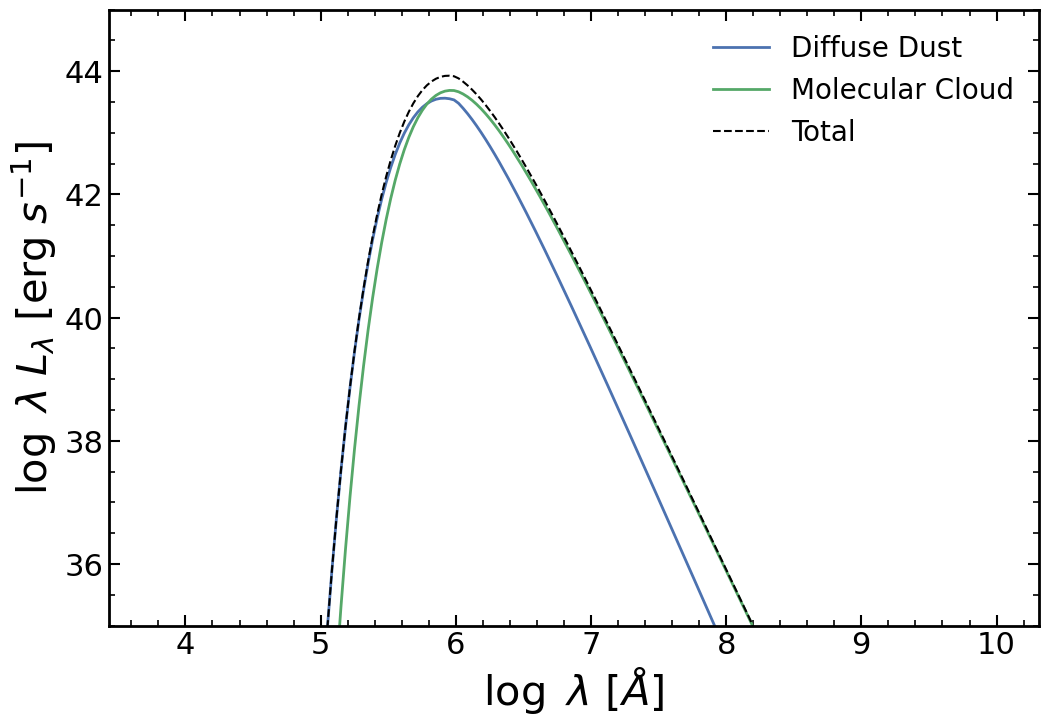

In [45]:
plt.figure(figsize=(12, 8))
plt.ylim(35,45)
plt.xlabel( '$\\log\\ \\lambda\\ [\\AA]$' )
plt.ylabel( '$\\log\\ \\lambda\\; L_\\lambda\\ [$erg$\\; s^{-1}]$' )
plt.plot( np.ma.log10( ll ), np.ma.log10( ll * Lsun * Ldd ), label='Diffuse Dust' )
plt.plot( np.ma.log10( ll ), np.ma.log10( ll * Lsun * Lmc ), label='Molecular Cloud' )
plt.plot( np.ma.log10( ll ), np.ma.log10( ll * Lsun * (Ldd+Lmc) ), label='Total', c='k', ls='--', lw=1.5 )
_ = plt.legend()

## **Attenuation**

In [37]:
Amc = ism.mc.attenuation(ll)
Add = ism.dd.attenuation(ll)

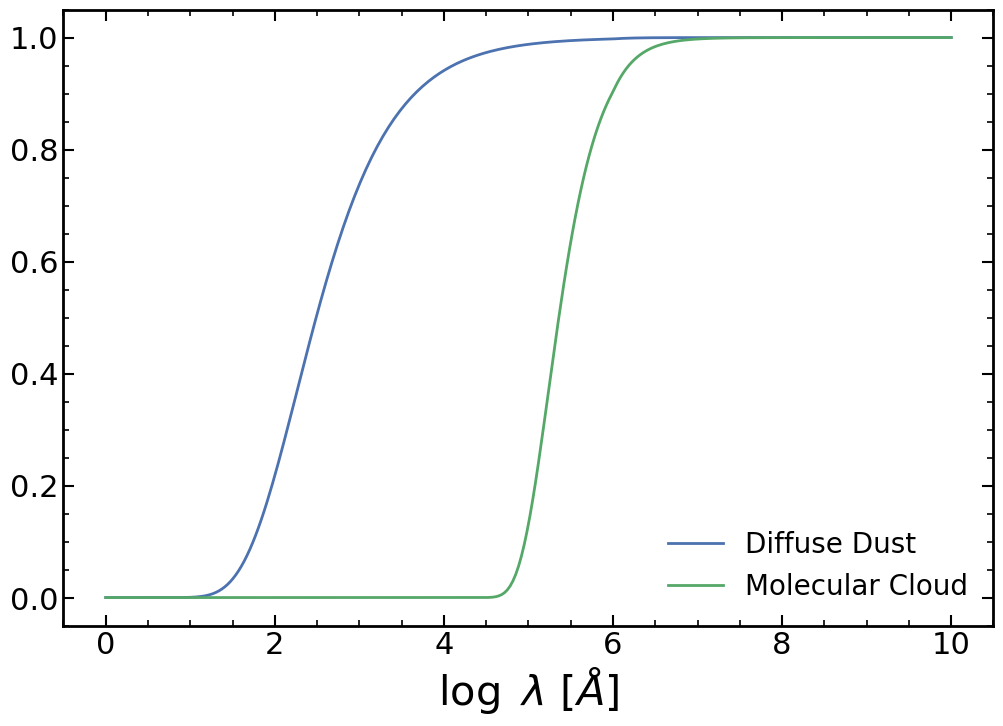

In [47]:
plt.figure(figsize=(12, 8))
plt.xlabel( '$\\log\\ \\lambda\\ [\\AA]$' )
plt.plot( np.ma.log10( ll ), Add, label='Diffuse Dust' )
plt.plot( np.ma.log10( ll ), Amc, label='Molecular Cloud' )
_ = plt.legend()

## **Extinction**

In [39]:
Extmc = ism.mc.extinction(ll) / ism.mc.A_V()
Extdd = ism.dd.extinction(ll) / ism.dd.A_V()

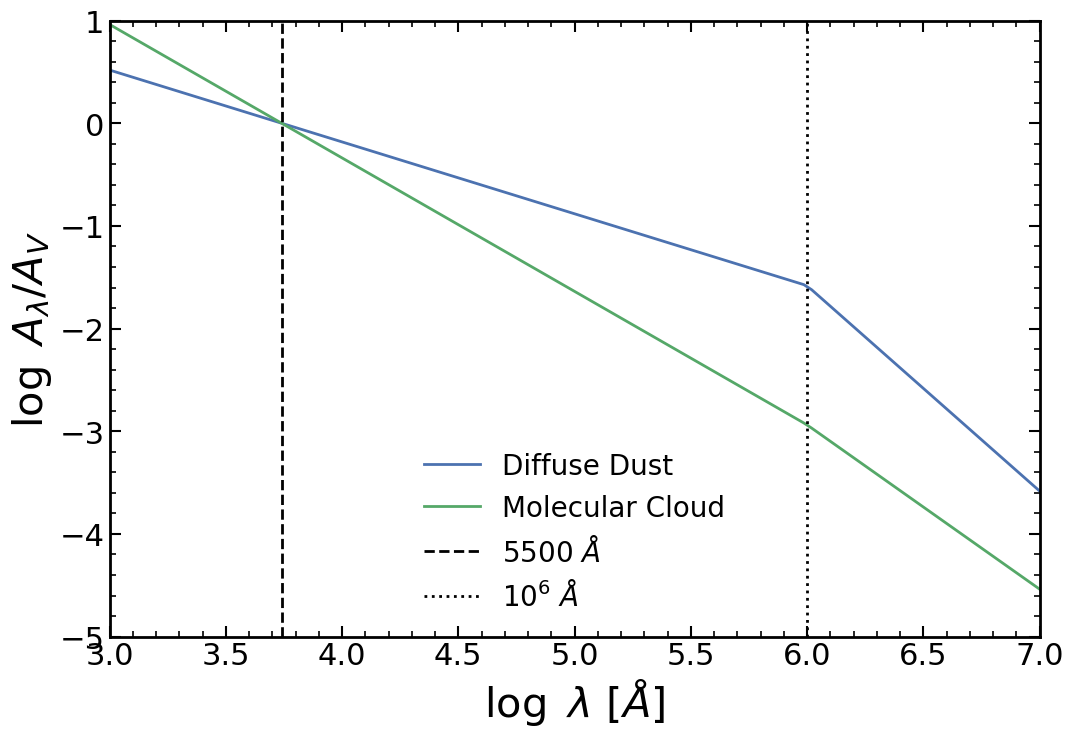

In [49]:
plt.figure(figsize=(12, 8))
plt.xlim(3,7)
plt.ylim(-5,1)
plt.xlabel( '$\\log\\ \\lambda\\ [\\AA]$' )
plt.ylabel( '$\\log\\ A_\\lambda/A_V$' )
plt.plot( np.ma.log10( ll ), np.ma.log10( Extdd ), label='Diffuse Dust' )
plt.plot( np.ma.log10( ll ), np.ma.log10( Extmc ), label='Molecular Cloud' )
plt.axvline( np.log10(5500), c='k', ls='--', label='$5500\\ \\AA$' )
plt.axvline( 6, c='k', ls=':', label = '$10^6\\ \\AA$')
_ = plt.legend()

## **Total attenuation**

In [41]:
t_esc = ism.mc.params['tau_esc']
tunit = np.logspace( np.log10(.8), np.log10(4), 100 ) # time array in units of tau_esc
tt = tunit * t_esc                                    # time array in unit of [yr]

In [42]:
attTotMC, attTot = ism.total_attenuation( ll, tt )
attTotMC = attTotMC.reshape(ll.size, tt.size)
attTot   = attTot.reshape(ll.size, tt.size)

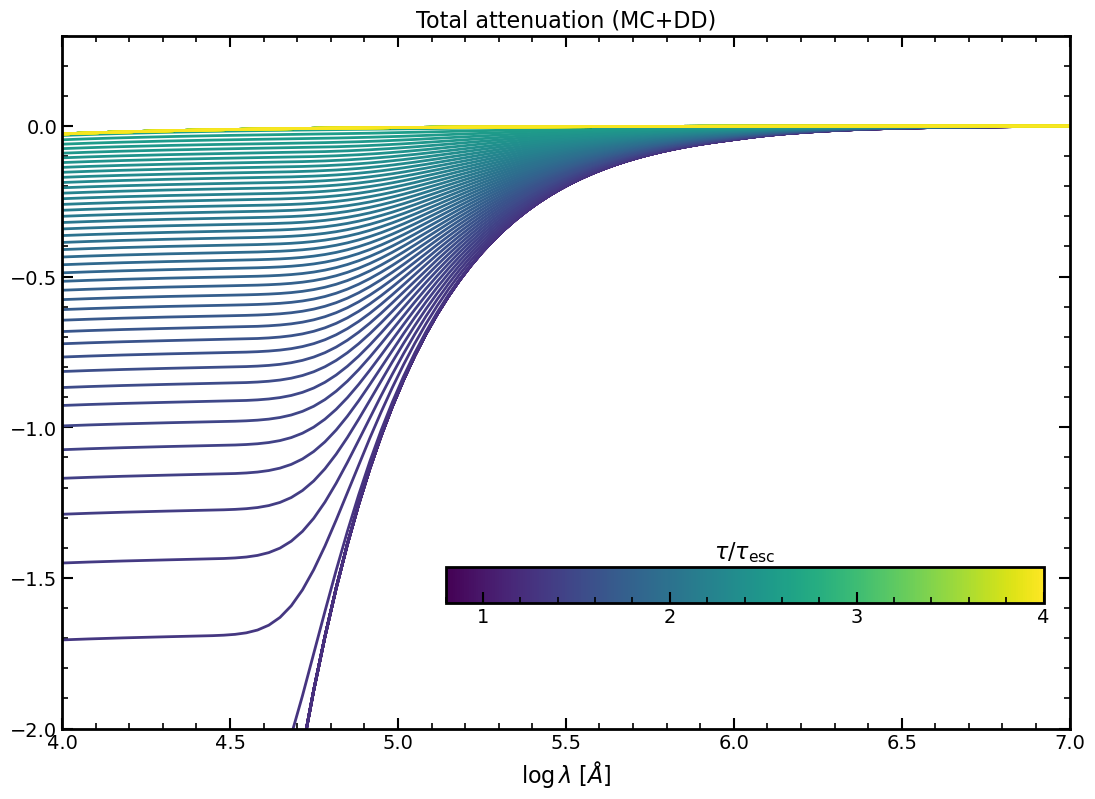

In [54]:
from matplotlib.colors import Normalize
fig, ax = plt.subplots( 1,1, figsize=(13, 9) )

# Plot
ax.set_xlim( 4, 7 )
ax.set_ylim( -2, 0.3 )
ax.set_prop_cycle( color=plt.cm.viridis(np.linspace(0.01,0.99,len(tt))) )
ax.set_xlabel( '$\\log \\lambda\\ [\\AA]$', fontsize = 16 )
#ax.set_ylabel( '$\\log\\ S_\\nu\\ [m\\,\\mathrm{Jy}]$', fontsize = 16 )
ax.set_title("Total attenuation (MC+DD)", fontsize=16)
for _t, _a in zip( tunit, attTot.T ) :
    ax.plot(np.ma.log10( ll ), np.ma.log10( _a ) )

# Color-map
cmap = plt.cm.viridis
norm = Normalize( vmin=np.min(tunit), vmax=np.max(tunit) ) # normalization
cax = fig.add_axes([0.42, 0.25, 0.46, 0.04])               # position
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                    cax=cax,
                    orientation='horizontal',
                    ticks=[1, 2, 3, 4])
_ = cbar.ax.set_title( "$\\tau / \\tau_\\mathrm{esc}$", fontsize=16)

# Formatting
format_axes_ticks(fig)